# Preprocessing-COCO
In this Notebook, we'll do the following.

* Select and merge labels from the full ADE20k dataset that we want to keep
* Select the scenes from the full ADE20k dataset that we want to use for training
* Create new annotation images for each of the selected scenes
* Store this newly created dataset in the COCO format
* Visualize the scenes and their annotations side-by-side

In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import matplotlib.pyplot as plt
import pylab

from imageio import imread
from conversion import *

In [3]:
# This is the path to the full ADE20K dataset unzipped.
SRC_DIR = "../../datasets/ADE20K_2016_07_26/"

# This is the destination directory that will store the newly
# generated dataset. This directory will be created during the 
# dataset generation process.
DEST_DIR = "../../datasets/bedroom_scenes_coco"

# TODO: Select scenes of interest to keep using keywords.
required_keywords = [
    'bedroom', 'childs_room', 'dorm_room', 'hotel_room',  
]

# TODO: Select keywords that cannot be in the sample name. "Outdoor" is
# a common choice here to choose indoor vs outdoor garage scenes, for 
# example.
reject_keywords = ["outdoor", ]

# This list of tuples represents the new label encoding we will be using.
# Each tuple contains all of the classes we'll combine together.
want_labels = [
    ('background', ),
    ('door', 'doorframe, doorcase', 'double door'),
    ('bed', 'bedpost', 'blanket, cover', 'headboard',),
    ('wardrobe, closet, press', ),
    ('lamp', ),
    ('chest of drawers, chest, bureau, dresser', 'chest'),
    ('pillow', ),
    ('armchair', 'chair', 'swivel chair'),
    ('pane, pane of glass, window glass', 'windowpane, window',),
    ('curtain, drape, drapery, mantle, pall',),
    ('mirror',),
    ('painting, picture', 'frame',),
    ('wall',),
    ('ceiling',),
    ('floor, flooring',),
    ('cabinet', )
]

In [4]:
%%time
convert_to_coco(SRC_DIR,
                DEST_DIR,
                required_keywords=required_keywords,
                reject_keywords=reject_keywords,
                want_labels=want_labels)

Processing partition training
Processed [500]/[1680]
Processed [1000]/[1680]
Processed [1500]/[1680]
Saving to ../../datasets/bedroom_scenes_coco/annotations/instances_train2014.json
Completed training partition
Kept a total of 1680 of the 1680 images
Processing partition validation
Saving to ../../datasets/bedroom_scenes_coco/annotations/instances_val2014.json
Completed validation partition
Kept a total of 168 of the 168 images
CPU times: user 6min 44s, sys: 8.02 s, total: 6min 52s
Wall time: 8min 9s


## Visualize New Segmentation Masks

In [7]:
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

In [9]:
partition = "train"  # "train" or "val"
annotation_file = os.path.join(DEST_DIR, 'annotations',
                               f"instances_{partition}2014.json")
img_dir = os.path.join(DEST_DIR, f"{partition}2014")
dataset_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [10]:
raw_categories = dataset_coco.loadCats(dataset_coco.getCatIds())
category_ids = [category['id'] for category in raw_categories]
categories = [category['name'] for category in raw_categories]
image_ids = dataset_coco.getImgIds()

print(f"All categories: \n{categories}")
print(f"Category Ids: {category_ids}")

All categories: 
['door | doorframe, doorcase | double door', 'bed | bedpost | blanket, cover | headboard', 'wardrobe, closet, press', 'lamp', 'chest of drawers, chest, bureau, dresser | chest', 'pillow', 'armchair | chair | swivel chair', 'pane, pane of glass, window glass | windowpane, window', 'curtain, drape, drapery, mantle, pall', 'mirror', 'painting, picture | frame', 'wall', 'ceiling', 'floor, flooring', 'cabinet']
Category Ids: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [21]:
def show_random_sample():
    plt.figure(figsize=(20,40), dpi=150)
    image_id = np.random.choice(image_ids)
    image_data = dataset_coco.loadImgs([image_id])[0]

    # Load and display instance annotations
    basename = f'{image_id}.jpg'
    img_fp = os.path.join(img_dir, basename)
    image = imread(img_fp)

    ax = plt.subplot(1, 2, 1)
    ax.imshow(image)
    ax.axis('off')
    pylab.rcParams['figure.figsize'] = (8.0, 10.0)

    ax = plt.subplot(1, 2, 2)
    ax.imshow(image)
    ax.axis('off')

    annotation_ids = dataset_coco.getAnnIds(imgIds=image_data['id'])
    annotations = dataset_coco.loadAnns(annotation_ids)
    dataset_coco.showAnns(annotations)

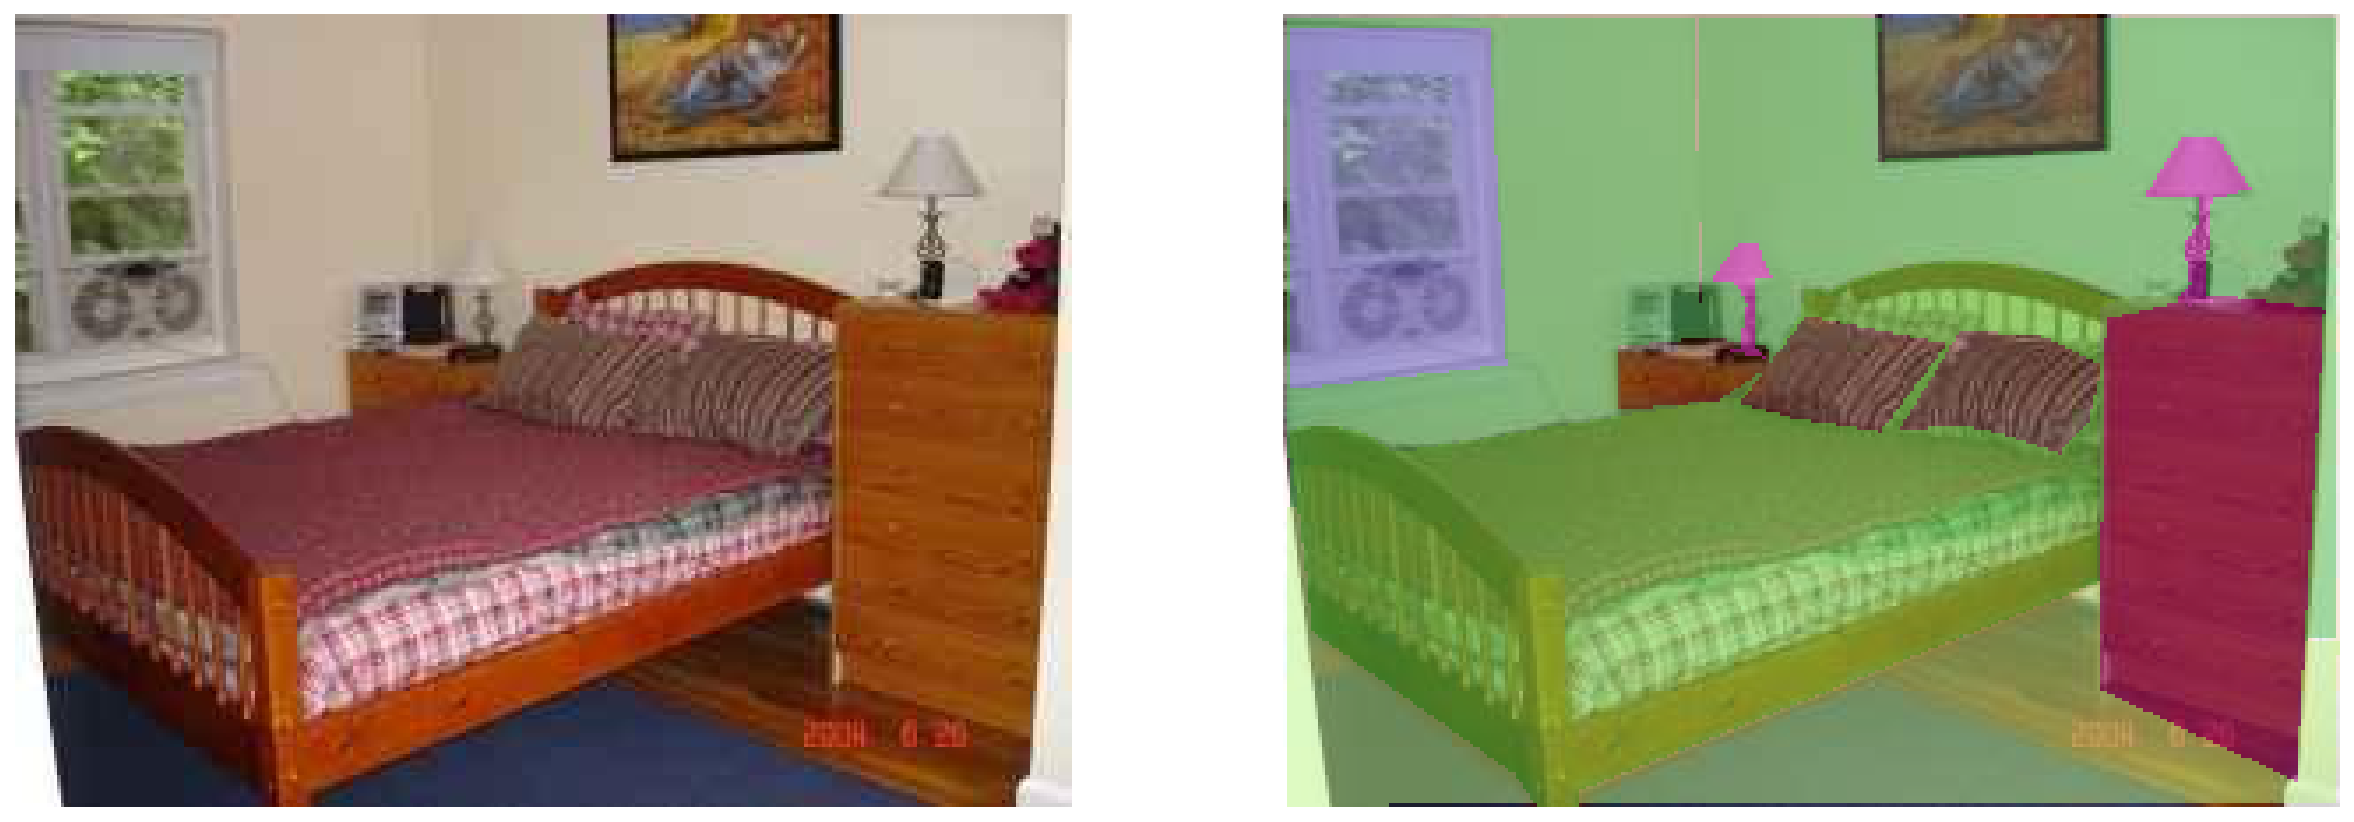

In [22]:
show_random_sample()

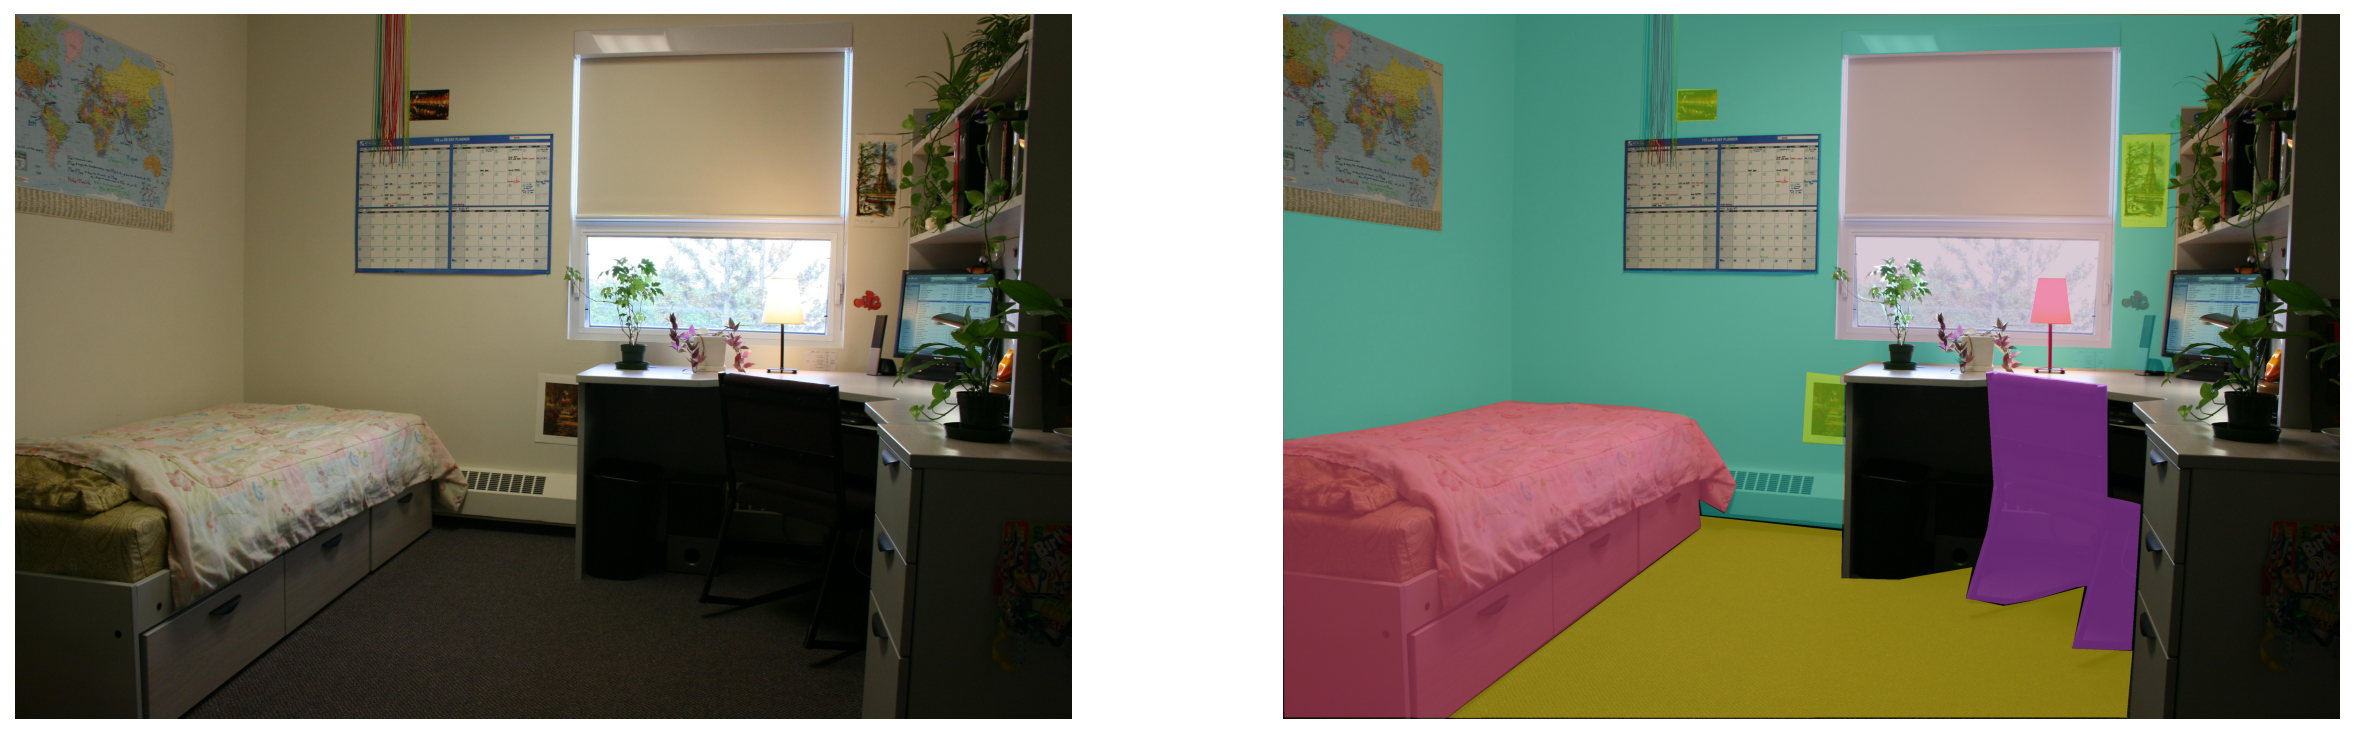

In [23]:
show_random_sample()

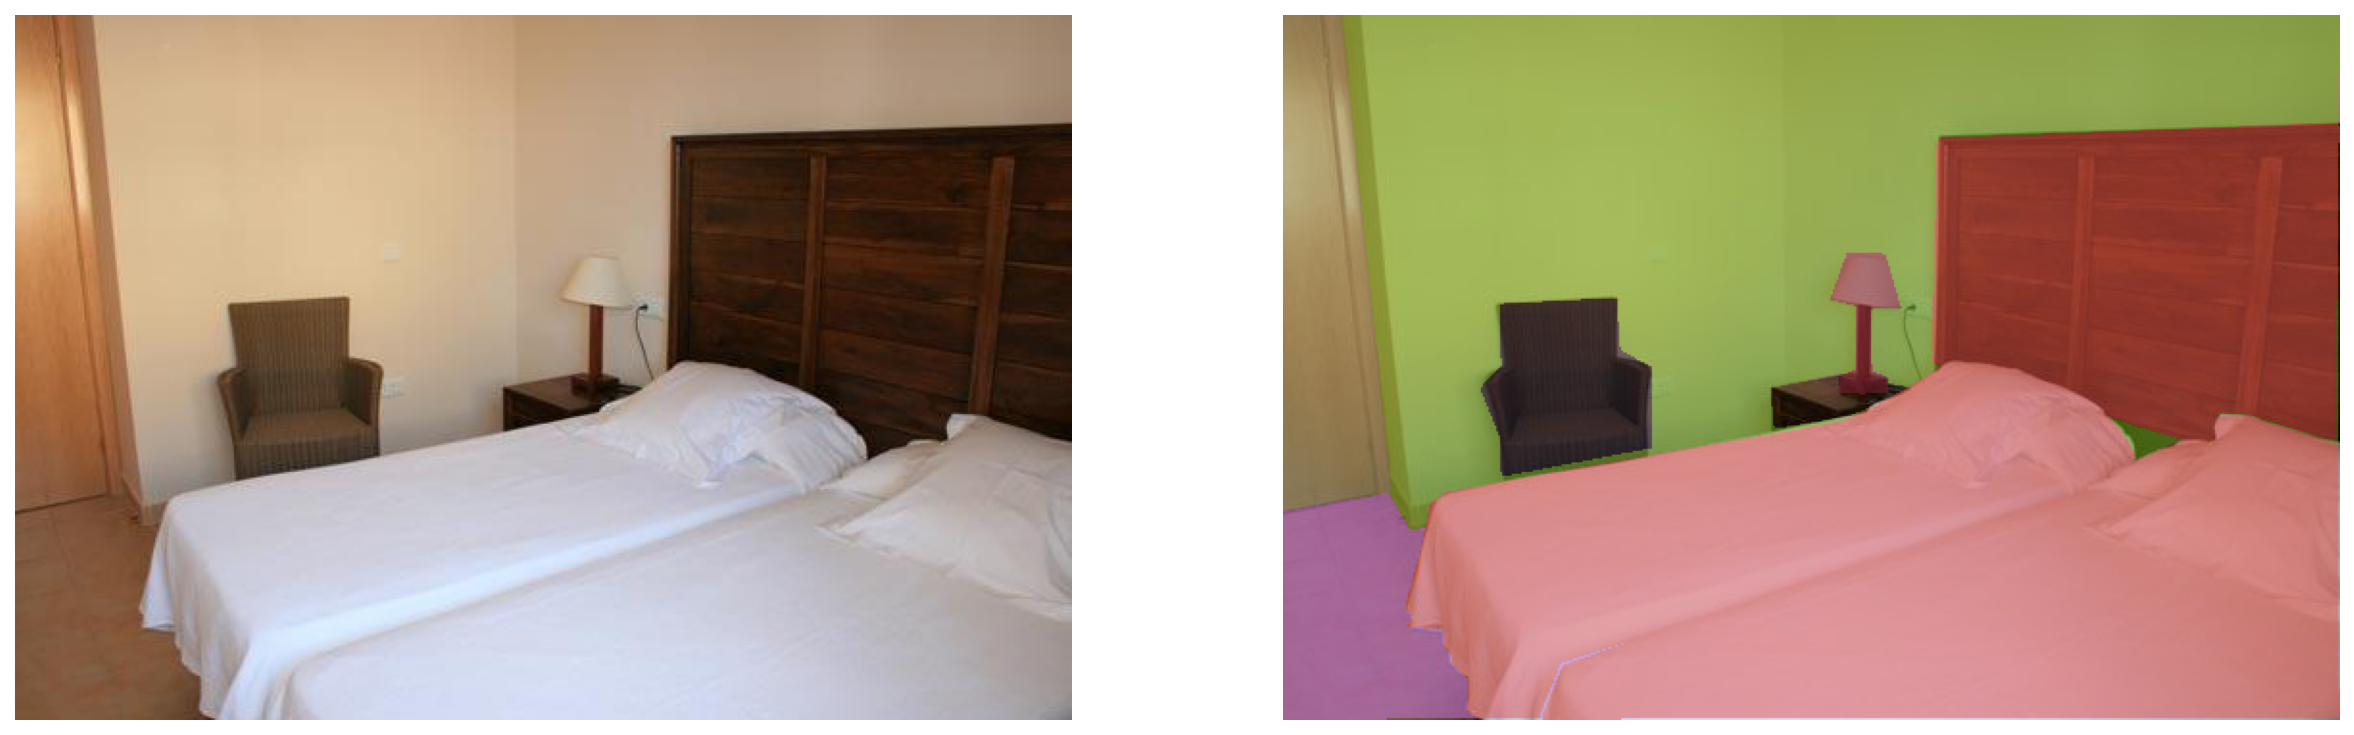

In [24]:
show_random_sample()